# Analyze JAKi Dose Response

Import packages needed for the analysis.  Note: to execute code in a cell press "Shift return"

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import fit
import flow_data as flow
%matplotlib inline

Get data file names using glob.  Note that each text file is obtained by exporting from flowjo, and contains all the single cell measurements.

In [9]:
file_names = glob.glob('data/*.txt')

Load each text file into a unique 'flow' class instance.  Classes, in a nutshell, allow a variable instance to have multiple properties and functions associated with it.  Here, I load 'flow' class instance for each text file.

In [10]:
data = []
for wfile in file_names:
    #the '+=' syntack is similar to C, it appends that data list
    #the load_data function, reads the text file and organizes data
    data += [flow.data(wfile)]

Here is another example of a function in the 'flow' class.

In [11]:
data[1].print_channels()

0) FSC-A
1) FSC-H
2) SSC-A
3) <PE-A>: JAK1
4) <PerCP-Cy5-5-A>: CD25
5) <Pacific Blue-A>: pSTAT5
6) <APC-A>: STAT5


Compute the mean of the log10(pSTAT5) for each inhib dose

In [13]:
pstat = np.array([])
for wdata in data:
    temp = np.mean(np.log10(wdata.get_data('pSTAT5')))
    pstat = np.hstack([pstat,temp])

#transform data to linear scale, because hill model is a linear model
pstat = 10**pstat
#inhibitor concentrations in nM, note that exponents in python
# are represented as '**' not '^'.  Also, you do not need matlab's '.' 
# notation to specify an array operation.
inhib_dose = 1000 / 2**np.linspace(0,11,12)

Fit the data to a hill model using the 'fit' class.

In [14]:
pars_mle = fit.fit_hill(inhib_dose,pstat)

Optimization terminated successfully.
         Current function value: 69173.120970
         Iterations: 189
         Function evaluations: 325


Plot the result

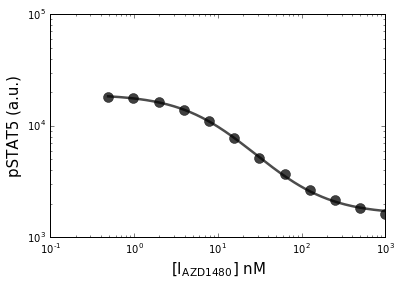

In [15]:
xplot = np.logspace(np.log10(inhib_dose.min()),
                   np.log10(inhib_dose.max()),
                    250)

plt.figure()
plt.plot(inhib_dose,pstat,'o',
        color = 'k',ms = 10,alpha = 0.75)
plt.plot(xplot,fit.hill_model(pars_mle,xplot),'-',
        linewidth = 2.5,color = 'k',alpha = 0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'[I$_\mathregular{AZD1480}$] nM',fontsize = 15)
plt.ylabel('pSTAT5 (a.u.)',fontsize = 15)
plt.show(block = False)